# **Datetime Index**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

In [ ]:
from datetime import datetime

In [ ]:
my_year = 2017
my_month = 1
my_day = 2
my_hour = 13
my_minute = 30
my_second = 15

In [ ]:
my_date = datetime(my_year,my_month,my_day)
my_date

datetime.datetime(2017, 1, 2, 0, 0)

In [ ]:
my_date_time = datetime(my_year, my_month, my_day,my_hour,my_minute, my_second)
my_date_time

datetime.datetime(2017, 1, 2, 13, 30, 15)

In [ ]:
first_two = [datetime(2016,1,1), datetime(2016,1,2)]
first_two

[datetime.datetime(2016, 1, 1, 0, 0), datetime.datetime(2016, 1, 2, 0, 0)]

In [ ]:
dt_index = pd.DatetimeIndex(first_two)
dt_index

DatetimeIndex(['2016-01-01', '2016-01-02'], dtype='datetime64[ns]', freq=None)

In [ ]:
data = np.random.randn(2,2)
data

array([[-0.77518005, -1.14521087],
       [ 1.62213359, -0.42444568]])

In [ ]:
cols = ['a','b']

In [ ]:
df = pd.DataFrame(data,dt_index,cols)
df

,a,b
2016-01-01,-0.775180,-1.145211
2016-01-02,1.622134,-0.424446


In [ ]:
df.index.argmax()

1

In [ ]:
df.index.max()

Timestamp('2016-01-02 00:00:00')

# **Time Resampling**

In [ ]:
!pip install quandl
import quandl

In [ ]:
df = quandl.get('WIKI/FB')
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2012-05-18,42.05,45.00,38.00,38.2318,573576400.0,0.0,1.0,42.05,45.00,38.00,38.2318,573576400.0
2012-05-21,36.53,36.66,33.00,34.0300,168192700.0,0.0,1.0,36.53,36.66,33.00,34.0300,168192700.0
2012-05-22,32.61,33.59,30.94,31.0000,101786600.0,0.0,1.0,32.61,33.59,30.94,31.0000,101786600.0
2012-05-23,31.37,32.50,31.36,32.0000,73600000.0,0.0,1.0,31.37,32.50,31.36,32.0000,73600000.0
2012-05-24,32.95,33.21,31.77,33.0300,50237200.0,0.0,1.0,32.95,33.21,31.77,33.0300,50237200.0


In [ ]:
df.index

DatetimeIndex(['2012-05-18', '2012-05-21', '2012-05-22', '2012-05-23',
               '2012-05-24', '2012-05-25', '2012-05-29', '2012-05-30',
               '2012-05-31', '2012-06-01',
               ...
               '2018-03-14', '2018-03-15', '2018-03-16', '2018-03-19',
               '2018-03-20', '2018-03-21', '2018-03-22', '2018-03-23',
               '2018-03-26', '2018-03-27'],
              dtype='datetime64[ns]', name='Date', length=1472, freq=None)

In [ ]:
df.resample(rule='BQ').mean() #A=year end frequency, BA=business year end frequency, BQS=business quarter start frequency
# we have to call an aggregate function after resampling

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2012-06-29,30.579900,31.323293,29.542500,30.239193,6.398079e+07,0.0,1.0,30.579900,31.323293,29.542500,30.239193,6.398079e+07
2012-09-28,23.342222,23.763297,22.779562,23.188579,4.334569e+07,0.0,1.0,23.342222,23.763297,22.779562,23.188579,4.334569e+07
2012-12-31,23.483305,23.949194,23.047771,23.487724,6.161711e+07,0.0,1.0,23.483305,23.949194,23.047771,23.487724,6.161711e+07
2013-03-29,28.475683,28.929962,28.018967,28.445942,5.601120e+07,0.0,1.0,28.475683,28.929962,28.018967,28.445942,5.601120e+07
2013-06-28,25.692425,26.035377,25.313141,25.615555,3.920212e+07,0.0,1.0,25.692425,26.035377,25.313141,25.615555,3.920212e+07
2013-09-30,37.065694,37.677309,36.590627,37.214703,6.822023e+07,0.0,1.0,37.065694,37.677309,36.590627,37.214703,6.822023e+07
2013-12-31,50.233672,51.092109,49.365591,50.207438,7.667938e+07,0.0,1.0,50.233672,51.092109,49.365591,50.207438,7.667938e+07
2014-03-31,63.520656,64.404259,62.360887,63.368538,6.001523e+07,0.0,1.0,63.520656,64.404259,62.360887,63.368538,6.001523e+07
2014-06-30,61.543968,62.495737,60.498860,61.513456,6.137849e+07,0.0,1.0,61.543968,62.495737,60.498860,61.513456,6.137849e+07


In [ ]:
df.resample(rule='A').max()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2012-12-31,42.05,45.00,38.00,38.2318,573576400.0,0.0,1.0,42.05,45.00,38.00,38.2318,573576400.0
2013-12-31,58.32,58.58,57.37,57.9600,365457900.0,0.0,1.0,58.32,58.58,57.37,57.9600,365457900.0
2014-12-31,82.02,82.17,80.75,81.4500,150178900.0,0.0,1.0,82.02,82.17,80.75,81.4500,150178900.0
2015-12-31,108.80,110.65,108.00,109.0100,86211323.0,0.0,1.0,108.80,110.65,108.00,109.0100,86211323.0
2016-12-31,133.50,135.60,132.22,133.2800,107475327.0,0.0,1.0,133.50,135.60,132.22,133.2800,107475327.0
2017-12-31,183.51,184.25,182.09,183.0300,68065163.0,0.0,1.0,183.51,184.25,182.09,183.0300,68065163.0
2018-12-31,192.04,195.32,189.98,193.0900,128925534.0,0.0,1.0,192.04,195.32,189.98,193.0900,128925534.0


In [ ]:
def first_day(entry):
  return entry[0];

In [ ]:
df.resample(rule='A').apply(first_day)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2012-12-31,42.05,45.00,38.00,38.2318,573576400.0,0.0,1.0,42.05,45.00,38.00,38.2318,573576400.0
2013-12-31,27.44,28.18,27.42,28.0000,69846400.0,0.0,1.0,27.44,28.18,27.42,28.0000,69846400.0
2014-12-31,54.83,55.22,54.19,54.7100,43195500.0,0.0,1.0,54.83,55.22,54.19,54.7100,43195500.0
2015-12-31,78.58,78.93,77.70,78.4500,18177475.0,0.0,1.0,78.58,78.93,77.70,78.4500,18177475.0
2016-12-31,101.95,102.24,99.75,102.2200,37912403.0,0.0,1.0,101.95,102.24,99.75,102.2200,37912403.0
2017-12-31,116.03,117.84,115.51,116.8600,20663912.0,0.0,1.0,116.03,117.84,115.51,116.8600,20663912.0
2018-12-31,177.68,181.58,177.55,181.4200,17694891.0,0.0,1.0,177.68,181.58,177.55,181.4200,17694891.0


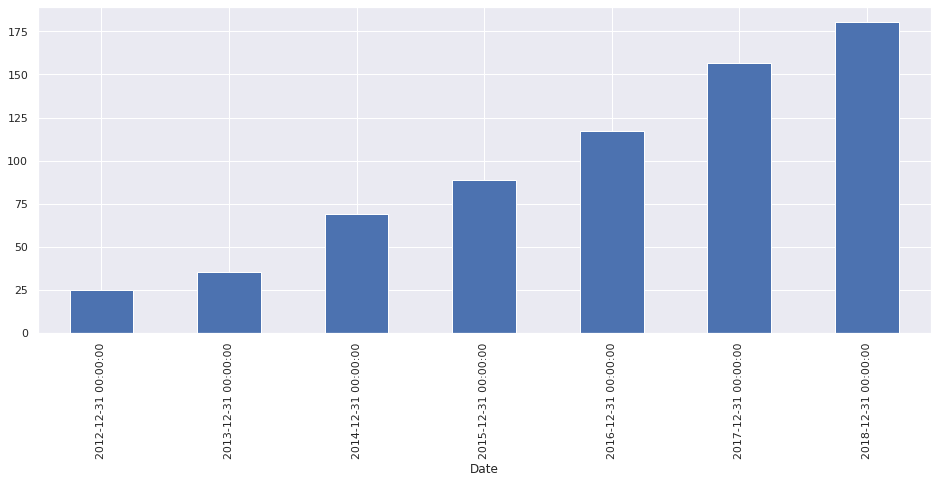

In [ ]:
df['Close'].resample('A').mean().plot(kind='bar',figsize=(16,6))

# **Time Shifts**

In [ ]:
df

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2012-05-18,42.05,45.00,38.00,38.2318,573576400.0,0.0,1.0,42.05,45.00,38.00,38.2318,573576400.0
2012-05-21,36.53,36.66,33.00,34.0300,168192700.0,0.0,1.0,36.53,36.66,33.00,34.0300,168192700.0
2012-05-22,32.61,33.59,30.94,31.0000,101786600.0,0.0,1.0,32.61,33.59,30.94,31.0000,101786600.0
2012-05-23,31.37,32.50,31.36,32.0000,73600000.0,0.0,1.0,31.37,32.50,31.36,32.0000,73600000.0
2012-05-24,32.95,33.21,31.77,33.0300,50237200.0,0.0,1.0,32.95,33.21,31.77,33.0300,50237200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,164.80,173.40,163.30,169.3900,105350867.0,0.0,1.0,164.80,173.40,163.30,169.3900,105350867.0
2018-03-22,166.13,170.27,163.72,164.8900,73389988.0,0.0,1.0,166.13,170.27,163.72,164.8900,73389988.0
2018-03-23,165.44,167.10,159.02,159.3900,52306891.0,0.0,1.0,165.44,167.10,159.02,159.3900,52306891.0


In [ ]:
df.shift(periods=1).head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2012-05-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-21,42.05,45.00,38.00,38.2318,573576400.0,0.0,1.0,42.05,45.00,38.00,38.2318,573576400.0
2012-05-22,36.53,36.66,33.00,34.0300,168192700.0,0.0,1.0,36.53,36.66,33.00,34.0300,168192700.0
2012-05-23,32.61,33.59,30.94,31.0000,101786600.0,0.0,1.0,32.61,33.59,30.94,31.0000,101786600.0
2012-05-24,31.37,32.50,31.36,32.0000,73600000.0,0.0,1.0,31.37,32.50,31.36,32.0000,73600000.0


In [ ]:
df.shift(periods=-1).tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-21,166.13,170.27,163.72,164.89,73389988.0,0.0,1.0,166.13,170.27,163.72,164.89,73389988.0
2018-03-22,165.44,167.10,159.02,159.39,52306891.0,0.0,1.0,165.44,167.10,159.02,159.39,52306891.0
2018-03-23,160.82,161.10,149.02,160.06,125438294.0,0.0,1.0,160.82,161.10,149.02,160.06,125438294.0
2018-03-26,156.31,162.85,150.75,152.19,76787884.0,0.0,1.0,156.31,162.85,150.75,152.19,76787884.0
2018-03-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.tshift(freq='M').head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  """Entry point for launching an IPython kernel.


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2012-05-31,42.05,45.00,38.00,38.2318,573576400.0,0.0,1.0,42.05,45.00,38.00,38.2318,573576400.0
2012-05-31,36.53,36.66,33.00,34.0300,168192700.0,0.0,1.0,36.53,36.66,33.00,34.0300,168192700.0
2012-05-31,32.61,33.59,30.94,31.0000,101786600.0,0.0,1.0,32.61,33.59,30.94,31.0000,101786600.0
2012-05-31,31.37,32.50,31.36,32.0000,73600000.0,0.0,1.0,31.37,32.50,31.36,32.0000,73600000.0
2012-05-31,32.95,33.21,31.77,33.0300,50237200.0,0.0,1.0,32.95,33.21,31.77,33.0300,50237200.0


# **Pandas Rolling and Expanding**

In [ ]:
df

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2012-05-18,42.05,45.00,38.00,38.2318,573576400.0,0.0,1.0,42.05,45.00,38.00,38.2318,573576400.0
2012-05-21,36.53,36.66,33.00,34.0300,168192700.0,0.0,1.0,36.53,36.66,33.00,34.0300,168192700.0
2012-05-22,32.61,33.59,30.94,31.0000,101786600.0,0.0,1.0,32.61,33.59,30.94,31.0000,101786600.0
2012-05-23,31.37,32.50,31.36,32.0000,73600000.0,0.0,1.0,31.37,32.50,31.36,32.0000,73600000.0
2012-05-24,32.95,33.21,31.77,33.0300,50237200.0,0.0,1.0,32.95,33.21,31.77,33.0300,50237200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,164.80,173.40,163.30,169.3900,105350867.0,0.0,1.0,164.80,173.40,163.30,169.3900,105350867.0
2018-03-22,166.13,170.27,163.72,164.8900,73389988.0,0.0,1.0,166.13,170.27,163.72,164.8900,73389988.0
2018-03-23,165.44,167.10,159.02,159.3900,52306891.0,0.0,1.0,165.44,167.10,159.02,159.3900,52306891.0


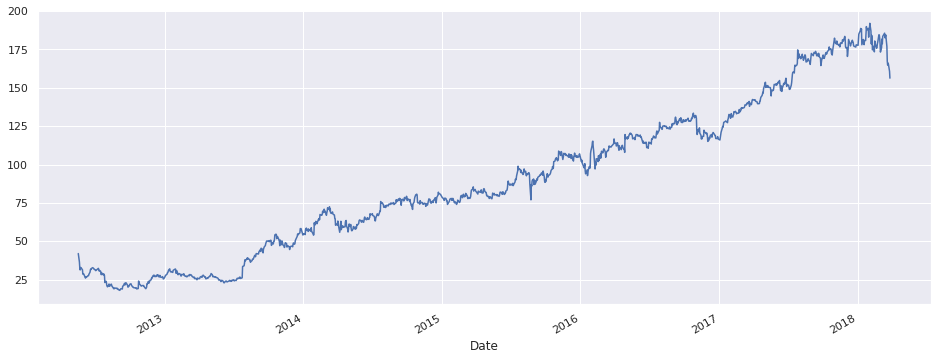

In [ ]:
df['Open'].plot(figsize=(16,6))

In [ ]:
df.rolling(window=7).mean().head(14)  # moving average

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2012-05-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-29,34.270000,35.085714,32.118571,32.720257,1.546580e+08,0.0,1.0,34.270000,35.085714,32.118571,32.720257,1.546580e+08
2012-05-30,32.362143,32.878571,30.670000,31.285714,8.089966e+07,0.0,1.0,32.362143,32.878571,30.670000,31.285714,8.089966e+07
2012-05-31,31.221429,31.880000,29.788571,30.652857,7.282059e+07,0.0,1.0,31.221429,31.880000,29.788571,30.652857,7.282059e+07


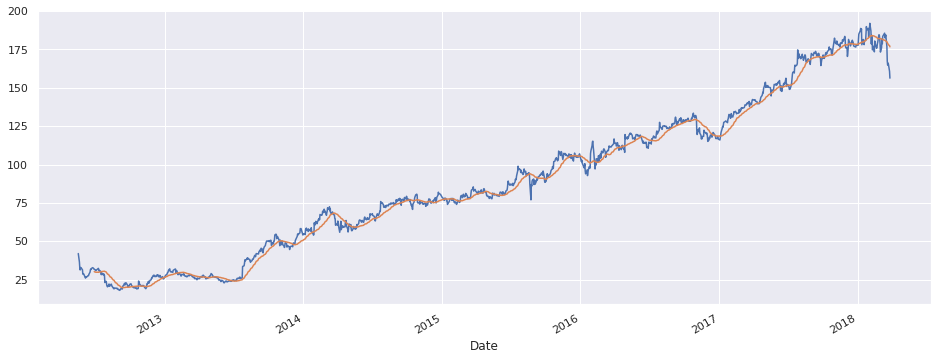

In [ ]:
df['Open'].plot()
df.rolling(window=30).mean()['Close'].plot(figsize=(16,6)) # 30 days MA

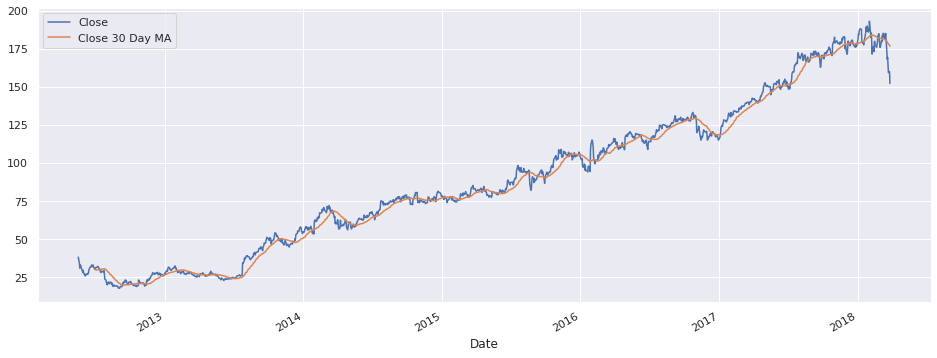

In [ ]:
# automatic legends by making a column
df['Close 30 Day MA'] = df['Close'].rolling(window=30).mean()
df[['Close', 'Close 30 Day MA']].plot(figsize=(16,6))

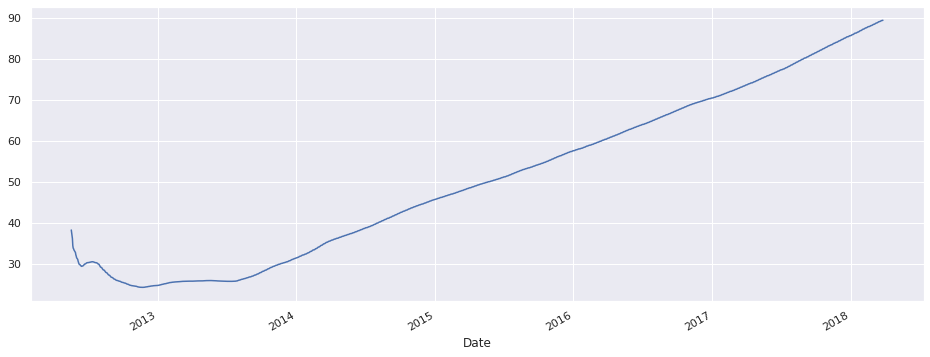

In [ ]:
df['Close'].expanding().mean().plot(figsize=(16,6)) # moving average of start date to current position x

# **Bolinger Band**

In [ ]:
# Close 20 MA
df['Close: 20 Day Mean'] = df['Close'].rolling(20).mean()

In [ ]:
# Upper = 20MA + 2*std(20)
df['Upper'] = df['Close: 20 Day Mean']+2*(df['Close'].rolling(20).std())

In [ ]:
# Lower = 20MA - 2*std(20)
df['Lower'] = df['Close: 20 Day Mean']-2*(df['Close'].rolling(20).std())

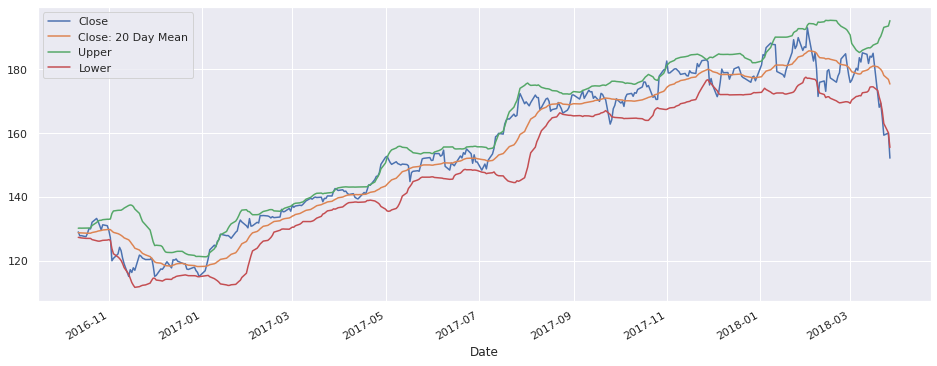

In [ ]:
df[['Close', 'Close: 20 Day Mean', 'Upper', 'Lower']].tail(365).plot(figsize=(16,6))